<a href="https://colab.research.google.com/github/sruthikoyya/SummerIntership_NITR/blob/main/TensorFlow_NITR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
#Split the data for training and testing
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


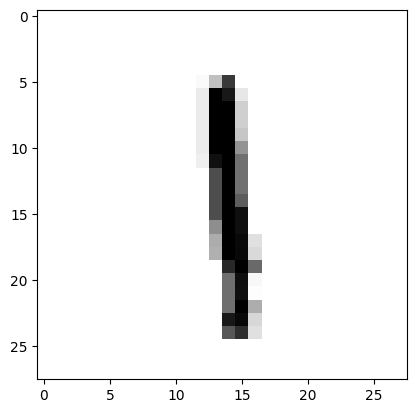

In [ ]:
plt.imshow(X_train[8],cmap=plt.cm.binary)
plt.show()

In [ ]:
#Normalizing the training data
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9013 - loss: 0.3373
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9820 - loss: 0.0570
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9883 - loss: 0.0354


In [ ]:
val_loss,val_acc=model.evaluate(X_test,y_test)
print(val_loss,val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0432
0.03645935654640198 0.987500011920929


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


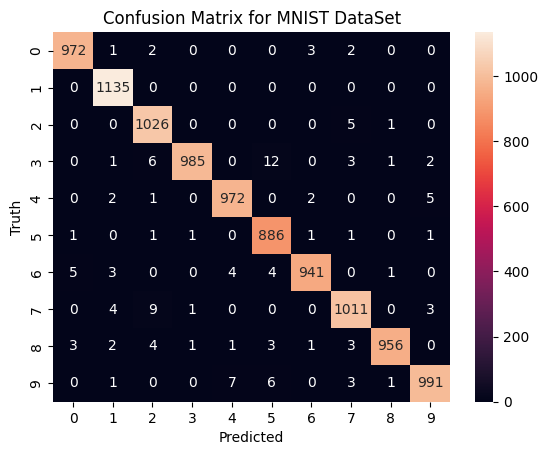

In [ ]:
y_pred=model.predict(X_test)
y_pred_labels=np.argmax(y_pred,axis=1)
cm=confusion_matrix(y_test,y_pred_labels)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for MNIST DataSet')
plt.show()

In [ ]:
"""model.save('mnist_num_reader.h5')
new_model=tf.keras.models.load_model('mnist_num_reader.h5')
predictions=new_model.predict(X_test)
print(predictions)

print(np.argmax(predictions[0]))
plt.imshow(X_test[0])
plt.show()"""

"model.save('mnist_num_reader.h5')\nnew_model=tf.keras.models.load_model('mnist_num_reader.h5')\npredictions=new_model.predict(X_test)\nprint(predictions)\n\nprint(np.argmax(predictions[0]))\nplt.imshow(X_test[0])\nplt.show()"